# Homework 09
This homework is based on the classification and regression lectures.

In [13]:
library(tidyverse)

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula.

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** |  converts each category into a separate binary (0/1) column.  |
| **Feature selection*** | restricting our regressions to just the most important variables.  |
| **Classifier** | a model that assigns inputs to categories (classes) instead of predicting numeric values. |
| **Precision** | how accurate a test is at finding the positive predicitive values. |
| **Recall** | how well your model finds all the actual positives. |
| **F1 Score** | combines precision and recall to find the harmonic mean. |
| **Parsimonious model** | encourage the model to be as simple as possible while still explaining the data. |
| **Ridge regression** | type of linear regression that adds a penalty to the size of the coefficients. |
| **LASSO regression** | it tends to force coefficients to zero one at a time rather than just constraining the total coefficient sum. |
| **Cross validation** | compares models fairly. |
| **Tree based methods** | given some independent variables and a dependent variable we pose a series of questions about the independent variables and this chops our data set up into smaller pieces for which the problem might be easier to solve.  |

*Just give the general idea.

## Question 2
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
A perfect classifier looks like a rectangle and a perfectly bad classifier looks like the line y=x.
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
For an f1 score of 1, the precision x recall must be half of the sum of the two, which means you have high precision and recall. To get an f1 score close to zero, either the recall or precision must be really low.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | straight line  | sigmoidal  |
| **Dependent Variable Type** | continuous numeric  | categorical/dichotomous  |
| **Purpose** (regression or classification) | regression | classification  |
| **Range of output variable** ($y_i$ or $p_i$) | $y_i$  | $p_i$  |
| **Method*** | least squares | maximum likelihood estimation  |
| **Example of use** | annual income of subjects in particular different countries  | whether someone is a smoker in a study  |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

We want to train our model first so that we can study how the model works, not so much how it performs on other data. We would do this by allowing the model to work on one portion of the data so it can learn patterns, and then test it on a separate portion to evaluate how well those patterns hold up on data it has not seen before.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [7]:
housing <- read.csv("housing.csv")
summary(housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

Linear regression is appropriate because we are predicting a continuous numeric outcome  based on continuous predictors.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [ ]:
set.seed(123)
housing_scaled <- scale(housing)

n <- nrow(housing_scaled)
train_index <- sample(1:n, size = 0.75 * n)
train_data <- housing_scaled[train_index, ]
test_data  <- housing_scaled[-train_index, ]

#### c) Fit the model.

In [ ]:
model <- lm(median_house_value ~ ., data = as.data.frame(train_data))
summary(model)


Call:
lm(formula = median_house_value ~ ., data = as.data.frame(train_data))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6929 -0.3844 -0.1012  0.2669  7.0686 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.0008768  0.0048872  -0.179   0.8576    
longitude          -0.7237084  0.0143999 -50.258   <2e-16 ***
latitude           -0.7732900  0.0145054 -53.310   <2e-16 ***
housing_median_age  0.1227835  0.0054735  22.432   <2e-16 ***
total_rooms        -0.0370233  0.0149344  -2.479   0.0132 *  
population         -0.4003812  0.0118345 -33.832   <2e-16 ***
households          0.4767179  0.0165913  28.733   <2e-16 ***
median_income       0.6333746  0.0060701 104.344   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.608 on 15472 degrees of freedom
Multiple R-squared:  0.6285,	Adjusted R-squared:  0.6284 
F-statistic:  3740 on 7 and 15472 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

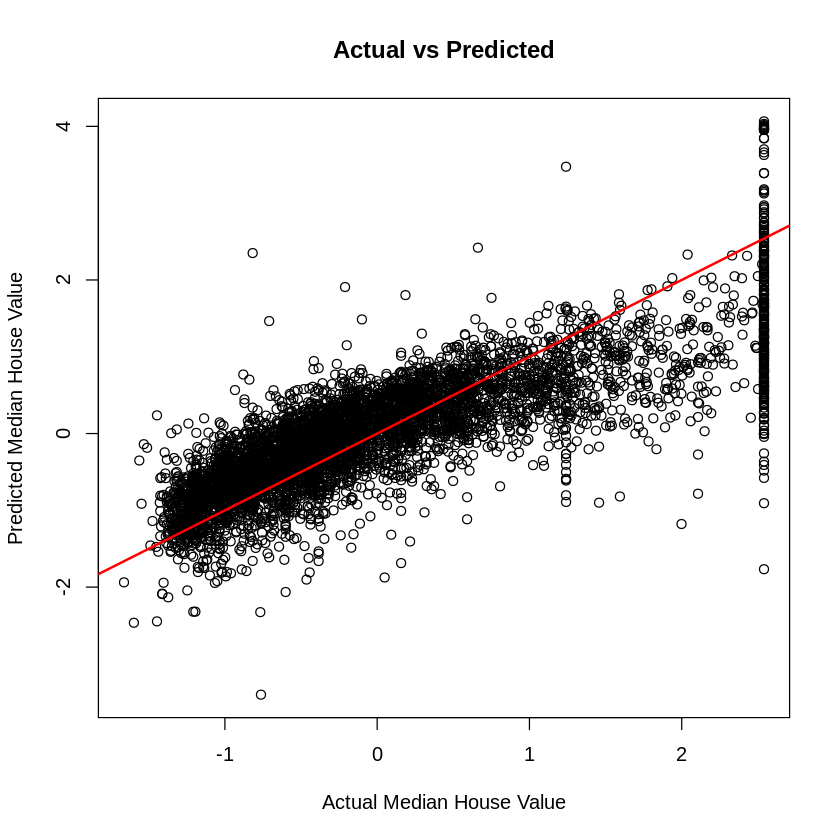

In [ ]:
predictions <- predict(model, newdata = as.data.frame(test_data))


plot(test_data[,"median_house_value"], predictions,
     xlab = "Actual Median House Value",
     ylab = "Predicted Median House Value",
     main = "Actual vs Predicted")
abline(0, 1, col = "red", lwd = 2)

#### e) Make a residuals plot.

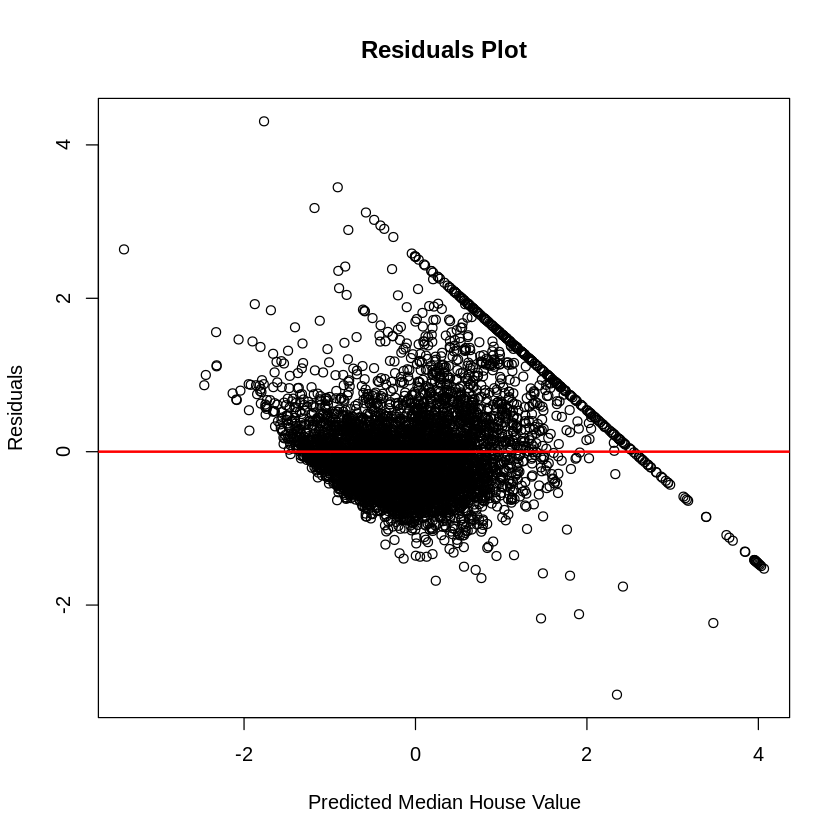

In [ ]:
residuals <- test_data[,"median_house_value"] - predictions
plot(predictions, residuals,
     xlab = "Predicted Median House Value",
     ylab = "Residuals",
     main = "Residuals Plot")
abline(h = 0, col = "red", lwd = 2)

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables.
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [8]:
diabetes <- read.csv("diabetes.csv")
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

Logistic regression is appropriate here because the dependent variable is categorical/binary, and we want to model probabilities between 0 and 1.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [9]:
set.seed(123)

num_cols <- sapply(diabetes, is.numeric)
# Exclude the 'Outcome' column from scaling
num_cols["Outcome"] <- FALSE

diabetes_scaled <- diabetes
diabetes_scaled[, num_cols] <- scale(diabetes[, num_cols])

# Convert the scaled data back to a data frame
diabetes_scaled <- as.data.frame(diabetes_scaled)

n <- nrow(diabetes_scaled)
train_index <- sample(1:n, size = 0.75 * n)
train_data <- diabetes_scaled[train_index, ]
test_data  <- diabetes_scaled[-train_index, ]

In [ ]:
names(diabetes)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

#### c) Fit the model.

In [10]:
model <- lm(Outcome ~ ., data = as.data.frame(train_data))
summary(model)


Call:
lm(formula = Outcome ~ ., data = as.data.frame(train_data))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9619 -0.2902 -0.0950  0.3073  1.2597 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.34253    0.01663  20.601  < 2e-16 ***
Pregnancies               0.06657    0.01994   3.339 0.000896 ***
Glucose                   0.19607    0.01902  10.309  < 2e-16 ***
BloodPressure            -0.04799    0.01828  -2.625 0.008909 ** 
SkinThickness             0.01342    0.02003   0.670 0.503041    
Insulin                  -0.02199    0.01917  -1.147 0.251954    
BMI                       0.10613    0.01914   5.546  4.5e-08 ***
DiabetesPedigreeFunction  0.03680    0.01639   2.246 0.025097 *  
Age                       0.03494    0.02073   1.685 0.092487 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3984 on 567 degrees of freedom
Multiple R-squared:  0.3123,	Adjusted 

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy.

In [11]:
pred_probs <- predict(model, newdata = test_data, type = "response")
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(Predicted = pred_class, Actual = test_data$Outcome)
conf_matrix

# Extract key metrics
TP <- conf_matrix["1","1"]
FP <- conf_matrix["1","0"]
TN <- conf_matrix["0","0"]
FN <- conf_matrix["0","1"]
accuracy <- (TP + TN) / sum(conf_matrix)

cat("\nTrue Positives:", TP,
    "\nFalse Positives:", FP,
    "\nTrue Negatives:", TN,
    "\nFalse Negatives:", FN,
    "\nAccuracy:", round(accuracy, 3), "\n")

         Actual
Predicted   0   1
        0 113  35
        1  12  32


True Positives: 32 
False Positives: 12 
True Negatives: 113 
False Negatives: 35 
Accuracy: 0.755 


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [19]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
set.seed(123)
x_train <- as.matrix(train_data[, names(train_data) != "Outcome"])
y_train <- train_data$Outcome
x_test  <- as.matrix(test_data[, names(test_data) != "Outcome"])
y_test  <- test_data$Outcome

lasso_fit <- cv.glmnet(x_train, y_train, alpha = 1, family = "binomial")

best_lambda <- lasso_fit$lambda.min
cat("Best lambda (penalty):", best_lambda, "\n")

coef_lasso <- coef(lasso_fit, s = "lambda.min")
print(coef_lasso)

lasso_pred_probs <- predict(lasso_fit, newx = x_test, s = "lambda.min", type = "response")
lasso_pred_class <- ifelse(lasso_pred_probs > 0.5, 1, 0)
lasso_acc <- mean(lasso_pred_class == y_test)
cat("LASSO Model Accuracy:", round(lasso_acc, 3), "\n")

Best lambda (penalty): 0.005550794 
9 x 1 sparse Matrix of class "dgCMatrix"
                           lambda.min
(Intercept)              -0.876174389
Pregnancies               0.358492638
Glucose                   1.094444717
BloodPressure            -0.191905694
SkinThickness             0.008646508
Insulin                  -0.076249360
BMI                       0.616989900
DiabetesPedigreeFunction  0.199031066
Age                       0.155747780
LASSO Model Accuracy: 0.766 


Blood Pressure and Insulin don't go to zero. It's importat because it compares the accuracy of the logistic regression model. It simplifies the model.

#### f) Make a plot of actual vs. predicted values for the LASSO model.

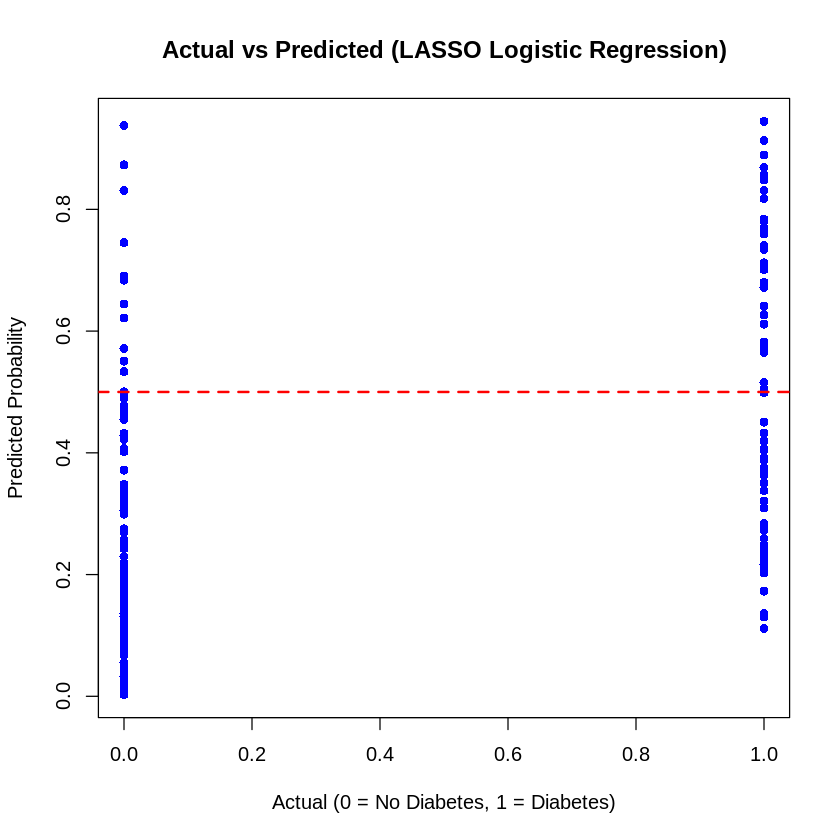

In [22]:
plot(y_test, lasso_pred_probs,
     xlab = "Actual (0 = No Diabetes, 1 = Diabetes)",
     ylab = "Predicted Probability",
     main = "Actual vs Predicted (LASSO Logistic Regression)",
     col = "blue", pch = 16)
abline(h = 0.5, col = "red", lwd = 2, lty = 2)